In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer data 1.xlsx to customer data 1.xlsx


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [ ]:
#Importing the dataset
import io
dt = pd.read_excel(io.BytesIO(uploaded['customer data 1.xlsx']))

dt.head()  

,Gender ?,Age,Marital Status,Current Education,Occupation,Annual Income,Family size,Model,How long you collect information before purchasing a car?,What is the usage of your car? [Shopping],What is the usage of your car? [Pick up family members],What is the usage of your car? [Short drive between cities],What is the usage of your car? [Social Activities],What is the usage of your car? [Commute to work],What is the usage of your car? [Load luggage/goods],Brand,Compeititive Price and discount,Safety,Comfort,Fuel-efficiency/Mileage,Engine,Color,Equipments,Exterior Design,Interior Design,Resale value,Better after sales service,Amount spent,Fuel Type,Transmission Mode,Purchasing Sources,Influencers_while_purchasing,Fashion_item,"To what extent, do you care other people see what car you are using when you go out?",Hyundai_App_use,Electric_car_awareness,Environmently_friendly_cars_infuture,Payment_mode,Satisfaction_with_car,Satisfaction_with_Aftersalesservice
0,2,2,2,3,1,3,2,9,2,2,2,3,2,3,1,4,4,4,4,4,4,4,3,3,3,4,4,3,1,1,"Friends and family members, Newspaper advertising",Make my own choice,2,2,No,No,Yes,1,4,4
1,1,2,2,3,2,2,3,2,3,3,5,2,2,5,1,5,5,5,4,4,4,3,3,3,3,4,5,2,1,1,"Brochure, Dealer sales staff, Friends and fami...",Friends/family,4,4,No,No,Yes,1,4,4
2,1,2,2,3,1,1,2,3,2,4,3,2,5,5,2,5,5,4,5,5,5,4,5,5,5,4,5,2,2,1,Dealer sales staff,Friends/family,4,5,No,Yes,Yes,1,5,5
3,2,2,2,3,1,3,2,3,5,4,4,2,5,2,2,5,5,5,5,5,5,5,3,3,5,3,5,1,1,1,"Friends and family members, TV advertising or ...",Make my own choice,2,1,No,Yes,Yes,3,5,5
4,1,2,2,3,1,1,2,2,3,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,3,3,1,1,1,"Brochure, Friends and family members, TV adver...",Make my own choice,3,3,No,Yes,Yes,1,5,4


In [ ]:
df=dt.drop(['Model','Purchasing Sources','Influencers_while_purchasing','Hyundai_App_use',	'Electric_car_awareness',	'Environmently_friendly_cars_infuture'],axis='columns')

In [ ]:
features = ["Gender ?","Age","Marital Status","Current Education",	"Occupation",	"Annual Income",	"Family size","How long you collect information before purchasing a car?",	"What is the usage of your car? [Shopping]",	"What is the usage of your car? [Pick up family members]",	"What is the usage of your car? [Short drive between cities]",	"What is the usage of your car? [Social Activities]",	"What is the usage of your car? [Commute to work]",	"What is the usage of your car? [Load luggage/goods]", "Brand","Compeititive Price and discount","Safety","Comfort","Engine",	"Color","Equipments",	"Exterior Design",	"Interior Design",	"Resale value",	"Better after sales service","Amount spent","Fuel Type",	"Transmission Mode",	"Fashion_item",	"To what extent, do you care other people see what car you are using when you go out?","Payment_mode",	"Satisfaction_with_car",	"Satisfaction_with_Aftersalesservice"]

#EDA

In [ ]:
dt.groupby('Model').mean()

,Gender ?,Age,Marital Status,Current Education,Occupation,Annual Income,Family size,How long you collect information before purchasing a car?,What is the usage of your car? [Shopping],What is the usage of your car? [Pick up family members],What is the usage of your car? [Short drive between cities],What is the usage of your car? [Social Activities],What is the usage of your car? [Commute to work],What is the usage of your car? [Load luggage/goods],Brand,Compeititive Price and discount,Safety,Comfort,Fuel-efficiency/Mileage,Engine,Color,Equipments,Exterior Design,Interior Design,Resale value,Better after sales service,Amount spent,Fuel Type,Transmission Mode,Fashion_item,"To what extent, do you care other people see what car you are using when you go out?",Payment_mode,Satisfaction_with_car,Satisfaction_with_Aftersalesservice
Model,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.133333,1.400000,1.400000,2.133333,1.600000,1.933333,2.000000,2.000000,2.133333,2.533333,2.466667,2.066667,2.933333,2.200000,4.400000,4.600000,4.600000,4.866667,4.800000,4.066667,3.466667,3.800000,4.533333,4.000000,4.200000,4.533333,1.733333,1.200000,1.133333,3.600000,4.266667,1.200000,3.866667,3.533333
2,1.095238,1.476190,1.571429,3.000000,1.142857,2.333333,2.047619,2.714286,2.285714,2.476190,2.142857,2.238095,1.809524,2.142857,4.285714,4.333333,4.142857,4.095238,4.190476,4.238095,3.523810,3.095238,3.380952,3.523810,3.619048,4.142857,1.666667,1.190476,1.095238,3.095238,3.238095,1.238095,4.523810,4.523810
3,1.274510,1.862745,1.666667,2.333333,1.490196,2.137255,2.098039,3.254902,2.803922,2.764706,2.431373,2.686275,3.980392,2.588235,4.450980,4.686275,4.823529,4.901961,4.686275,4.098039,3.941176,4.117647,4.235294,4.392157,4.000000,4.431373,1.980392,1.588235,1.450980,2.980392,3.470588,1.803922,4.549020,4.117647
4,1.000000,2.074074,1.814815,2.148148,2.370370,2.222222,1.777778,3.222222,2.148148,2.481481,2.888889,2.481481,3.407407,1.740741,4.111111,4.296296,4.777778,4.925926,4.370370,4.185185,3.666667,4.370370,3.814815,4.000000,4.555556,4.888889,2.296296,2.148148,1.481481,2.814815,3.111111,1.518519,4.518519,4.444444
5,1.095238,1.809524,1.809524,2.095238,2.047619,2.428571,2.190476,2.619048,2.047619,2.857143,2.904762,2.285714,3.476190,1.809524,4.476190,4.000000,4.761905,3.809524,4.190476,4.285714,3.238095,3.380952,3.857143,3.952381,3.809524,4.476190,2.571429,1.619048,1.333333,2.904762,3.809524,1.571429,4.428571,3.761905
6,1.300000,1.700000,1.650000,1.600000,1.900000,2.800000,1.850000,3.250000,1.700000,2.450000,2.350000,1.150000,3.600000,1.900000,3.550000,4.250000,4.150000,4.400000,4.600000,4.700000,4.000000,4.250000,3.850000,4.100000,3.850000,4.150000,2.550000,1.750000,1.300000,3.150000,3.750000,1.150000,3.250000,4.100000
7,1.888889,1.222222,1.333333,1.777778,2.777778,3.111111,1.444444,3.444444,2.555556,2.000000,1.222222,1.666667,3.888889,2.111111,4.777778,4.333333,5.000000,4.333333,4.888889,4.000000,4.666667,3.777778,4.555556,3.222222,3.444444,4.888889,2.222222,1.444444,1.111111,3.222222,4.000000,1.222222,4.000000,4.111111
8,1.666667,1.933333,1.866667,1.333333,2.000000,3.600000,2.600000,2.533333,2.600000,2.266667,2.600000,1.866667,4.400000,1.733333,4.600000,4.533333,4.466667,5.000000,4.266667,4.266667,4.466667,4.066667,3.933333,4.000000,4.266667,4.266667,2.933333,1.533333,1.466667,4.200000,4.333333,1.733333,4.000000,4.533333
9,1.190476,1.761905,1.857143,1.619048,2.190476,3.523810,2.761905,2.238095,2.428571,2.476190,3.333333,2.142857,3.428571,2.476190,4.761905,4.809524,4.761905,4.809524,4.809524,4.095238,4.000000,3.809524,4.047619,4.047619,4.285714,4.619048,3.142857,1.476190,1.476190,3.095238,3.619048,1.523810,4.190476,4.523810


#Pre-processing

In [ ]:
dt.isnull().sum()

Gender ?                                                                                0
Age                                                                                     0
Marital Status                                                                          0
Current Education                                                                       0
Occupation                                                                              0
Annual Income                                                                           0
Family size                                                                             0
Model                                                                                   0
How long you collect information before purchasing a car?                               0
What is the usage of your car? [Shopping]                                               0
What is the usage of your car? [Pick up family members]                                 0
What is th

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(dt[["Gender ?","Age","Marital Status","Current Education",	"Occupation",	"Annual Income",	"Family size","How long you collect information before purchasing a car?",	"What is the usage of your car? [Shopping]",	"What is the usage of your car? [Pick up family members]",	"What is the usage of your car? [Short drive between cities]",	"What is the usage of your car? [Social Activities]",	"What is the usage of your car? [Commute to work]",	"What is the usage of your car? [Load luggage/goods]", "Brand","Compeititive Price and discount","Safety","Comfort","Engine",	"Color","Equipments",	"Exterior Design",	"Interior Design",	"Resale value",	"Better after sales service","Amount spent","Fuel Type",	"Transmission Mode",	"Fashion_item",	"To what extent, do you care other people see what car you are using when you go out?","Payment_mode",	"Satisfaction_with_car",	"Satisfaction_with_Aftersalesservice"]]))
print(z)

[[1.77951304 0.35294118 0.67028006 ... 0.70731076 0.33814018 0.28234936]
 [0.56195149 0.35294118 0.67028006 ... 0.70731076 0.33814018 0.28234936]
 [0.56195149 0.35294118 0.67028006 ... 0.70731076 1.0420238  1.16559606]
 ...
 [0.56195149 1.11764706 1.49191369 ... 0.70731076 0.33814018 0.28234936]
 [0.56195149 1.11764706 1.49191369 ... 2.06645694 0.33814018 1.16559606]
 [0.56195149 1.11764706 1.49191369 ... 0.70731076 0.33814018 0.28234936]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([  5,   5,   5,   5,  10,  10,  15,  57,  57,  57,  57,  62,  62,
        69,  93,  93,  93,  93,  98,  98, 103, 127, 127, 127, 127, 132,
       132, 137, 157, 157, 162, 174, 174, 179]), array([14, 15, 16, 31, 15, 17, 21, 14, 15, 16, 31, 15, 17, 21, 14, 15, 16,
       31, 15, 17, 21, 14, 15, 16, 31, 15, 17, 21, 15, 17, 21, 15, 17, 21]))


In [ ]:
dt.shape

(200, 40)

In [ ]:
dt_new = dt[(z < 3).all(axis=1)]

In [ ]:
dt_new.shape

(184, 40)

In [ ]:
x= dt[features]
y=dt["Model"]

#Feature Selection using Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print(RandomForestClassifier())

from sklearn.feature_selection import SelectFromModel

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

In [ ]:
x= dt[features]
y=dt["Model"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [ ]:
sel.get_support()

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False])

In [ ]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Age', 'Occupation', 'Annual Income', 'Family size',
       'How long you collect information before purchasing a car?',
       'What is the usage of your car? [Shopping]',
       'What is the usage of your car? [Pick up family members]',
       'What is the usage of your car? [Short drive between cities]',
       'What is the usage of your car? [Social Activities]',
       'What is the usage of your car? [Commute to work]',
       'What is the usage of your car? [Load luggage/goods]', 'Comfort',
       'Color', 'Equipments', 'Amount spent', 'Fashion_item',
       'Satisfaction_with_car'],
      dtype='object')


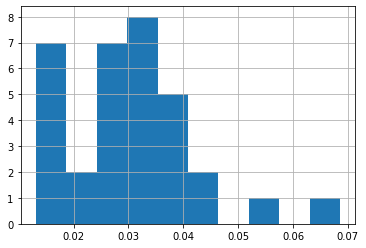

In [ ]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

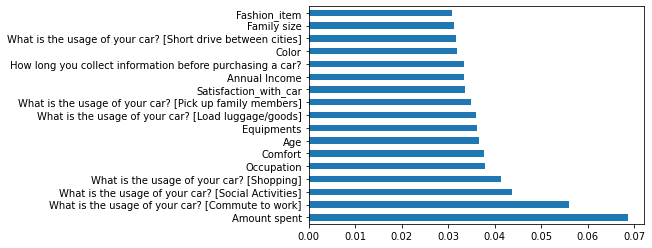

In [ ]:
(pd.Series(sel.estimator_.feature_importances_, index=x.columns)
   .nlargest(17)
   .plot(kind='barh'))

#Train Test Split

In [ ]:
x=dt[['Occupation', 'Annual Income',
       'How long you collect information before purchasing a car?',
       'What is the usage of your car? [Shopping]',
       'What is the usage of your car? [Pick up family members]',
       'What is the usage of your car? [Short drive between cities]',
       'What is the usage of your car? [Social Activities]',
       'What is the usage of your car? [Commute to work]',
       'What is the usage of your car? [Load luggage/goods]', 'Comfort',
       'Color', 'Equipments', 'Amount spent', 'Fuel Type', 'Fashion_item',
       'Payment_mode', 'Satisfaction_with_car']]
y=dt['Model']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Decision Tree classifier

In [ ]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier(criterion='entropy',
 max_depth=4,
 max_leaf_nodes=14,
 min_samples_split=2)

In [ ]:
model1.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predicted=model1.predict(x_test)
y_predicted

array([2, 2, 4, 3, 1, 6, 2, 4, 5, 6, 6, 5, 5, 8, 3, 3, 2, 4, 8, 9, 3, 3,
       9, 6, 3, 3, 4, 3, 1, 5, 4, 5, 1, 9, 8, 3, 3, 2, 2, 3])

In [ ]:
DT_confusion_matrix= metrics.confusion_matrix(y_test,y_predicted)
print(DT_confusion_matrix)

[[ 1  1  1  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0]
 [ 2  0 10  1  0  1  0  0  1]
 [ 0  0  0  4  0  1  0  0  0]
 [ 0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  2]]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

print("The model used is Decision Tree")
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is {} %".format(acc*100))
prec= precision_score(y_test,y_predicted,average='micro')
print("The precision is {} %".format(prec*100))
rec= recall_score(y_test,y_predicted,average='micro')
print("The recall is {} %".format(rec*100))
f1= f1_score(y_test,y_predicted,average='micro')
print("The F1-Score is {} %".format(f1*100))

The model used is Decision Tree
The accuracy is 75.0 %
The precision is 75.0 %
The recall is 75.0 %
The F1-Score is 75.0 %


In [ ]:
y_train_pred_dt = model1.predict(x_train)
DT_train_accuracy = accuracy_score(y_train,y_train_pred_dt)
DT_train_f1 = f1_score(y_train,y_train_pred_dt,average='micro')
print("Decision Tree Training Accuracy: ", DT_train_accuracy)
print("Decision Tree Training F1 Score: ", DT_train_f1)

Decision Tree Training Accuracy:  0.725
Decision Tree Training F1 Score:  0.7250000000000001


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
print(multiclass_roc_auc_score(y_test, y_pred, average="macro"))

0.8810708358734674


In [ ]:
params = {'criterion': ['gini','entropy'], 'max_leaf_nodes': list(range(2, 50)), 'min_samples_split': list(range(2, 5)), 'max_depth': [2,3,4]}
DT_grid_search_cv = GridSearchCV(model1, params, verbose=1, cv=5)
DT_grid_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:   12.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
DT_grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 14,
 'min_samples_split': 2}

#RANDOM FOREST CLASSIFIER

In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
model2= RandomForestClassifier(n_estimators=200,min_samples_leaf=5,random_state=42)
model2.fit(x_train,y_train)
# predictions
y_pred = model2.predict(x_test)



Text(0.5, 257.44, 'Predicted label')

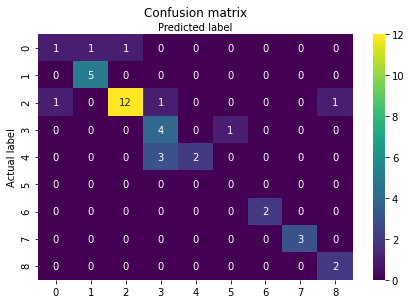

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing


print("The model used is Random Forest classifier")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is {} %".format(acc*100))
prec= precision_score(y_test,y_pred,average='micro')
print("The precision is {} %".format(prec*100))
rec= recall_score(y_test,y_pred,average='micro')
print("The recall is {} %".format(rec*100))
f1= f1_score(y_test,y_pred,average='micro')
print("The F1-Score is {} %".format(f1*100))


The model used is Random Forest classifier
The accuracy is 77.5 %
The precision is 77.5 %
The recall is 77.5 %
The F1-Score is 77.5 %


In [ ]:
y_train_pred_RF = model2.predict(x_train)
RF_train_accuracy = accuracy_score(y_train,y_train_pred_RF)
RF_train_f1 = f1_score(y_train,y_train_pred_RF,average='micro')
print("Random Forest Training Accuracy: ", RF_train_accuracy*100, "%")
print("Random Forest Training F1 Score: ", RF_train_f1*100, "%")

Random Forest Training Accuracy:  84.375 %
Random Forest Training F1 Score:  84.375 %


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
print(multiclass_roc_auc_score(y_test, y_pred, average="macro"))

0.8810708358734674


In [ ]:
model_params = {
    'n_estimators': [10,20,50,100,200],
    'min_samples_leaf': [5,10,15,20],
    'min_samples_split': [4, 6,8,10],
    'max_depth': [5,6,7]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# create random forest classifier model
rf_model = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv = 5, n_jobs = -1, verbose = 2)

# train the grid search meta-estimator to find the best model
model = clf.fit(x_train, y_train)

# print winning set of hyperparameters
print(model.best_estimator_.get_params())

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.9min finished


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


#Naive Bayes Algo

In [ ]:
from sklearn.naive_bayes import GaussianNB

model3= GaussianNB()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)# reasonate with reason why used Gaussian

In [ ]:
print("The model used is Naive Bayes classifier")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is {} %".format(acc*100))
prec= precision_score(y_test,y_pred,average='micro')
print("The precision is {} %".format(prec*100))
rec= recall_score(y_test,y_pred,average='micro')
print("The recall is {} %".format(rec*100))
f1= f1_score(y_test,y_pred,average='micro')
print("The F1-Score is {} %".format(f1*100))

The model used is Naive Bayes classifier
The accuracy is 40.0 %
The precision is 40.0 %
The recall is 40.0 %
The F1-Score is 40.00000000000001 %


In [ ]:
y_train_pred_nb = model3.predict(x_train)
NB_train_accuracy = accuracy_score(y_train,y_train_pred_nb)
NB_train_f1 = f1_score(y_train,y_train_pred_nb,average='micro')
print("Naive Bayes Training Accuracy: ", NB_train_accuracy*100,"%")
print("Naive Bayes Training F1 Score: ", NB_train_f1*100,"%")

Naive Bayes Training Accuracy:  50.625 %
Naive Bayes Training F1 Score:  50.625 %


In [ ]:
NB_confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
print(NB_confusion_matrix)

[[ 1  1  0  1  0  0  0  0  0]
 [ 1  4  0  0  0  0  0  0  0]
 [ 2  0  0 12  0  0  0  0  1]
 [ 0  0  0  4  0  1  0  0  0]
 [ 0  0  0  3  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  2  0]]


Text(0.5, 257.44, 'Predicted label')

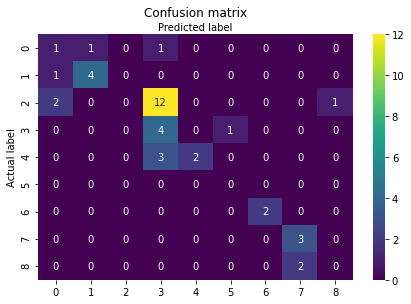

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(NB_confusion_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
print(multiclass_roc_auc_score(y_test, y_pred, average="macro"))

0.7303855076881394


#SVM Algo

In [ ]:
from sklearn.svm import SVC
model4 = SVC(C=1, gamma=1, kernel='rbf')
model4.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred=model4.predict(x_test)

In [ ]:
print("The model used is SVM")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is {} %".format(acc*100))
prec= precision_score(y_test,y_pred,average='micro')
print("The precision is {} %".format(prec*100))
rec= recall_score(y_test,y_pred,average='micro')
print("The recall is {} %".format(rec*100))
f1= f1_score(y_test,y_pred,average='micro')
print("The F1-Score is {} %".format(f1*100))

The model used is SVM
The accuracy is 82.5 %
The precision is 82.5 %
The recall is 82.5 %
The F1-Score is 82.5 %


In [ ]:
y_train_pred_svm = model4.predict(x_train)
svm_train_accuracy = accuracy_score(y_train,y_train_pred_svm)
svm_train_f1 = f1_score(y_train,y_train_pred_svm,average='micro')
print("SVM Training Accuracy: ", svm_train_accuracy*100,"%")
print("SVMTraining F1 Score: ", svm_train_f1*100,"%")

SVM Training Accuracy:  85.625 %
SVMTraining F1 Score:  85.625 %


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
print(multiclass_roc_auc_score(y_test, y_pred, average="macro"))

0.9239279787306103


In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.219, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.219, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.250, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.219, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.219, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.219, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.438, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.219, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.219, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.250, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.219, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


#KNN Algo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
model5= KNeighborsClassifier(n_neighbors=7) 

In [ ]:
model5.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
print(model5.score(x_test, y_test)) 
 

0.525


In [ ]:
y_pred = model5.predict(x_test)

In [ ]:
knn_confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
print(knn_confusion_matrix)

[[1 1 1 0 0 0 0 0]
 [0 5 0 0 0 0 0 0]
 [6 2 5 1 0 0 0 1]
 [0 3 0 1 0 0 0 1]
 [0 0 0 3 2 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 2]]


Text(0.5, 257.44, 'Predicted label')

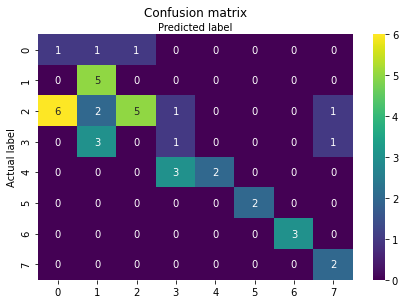

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(knn_confusion_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("The model used is KNN classifier")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is {} %".format(acc*100))
prec= precision_score(y_test,y_pred,average='micro')
print("The precision is {} %".format(prec*100))
rec= recall_score(y_test,y_pred,average='micro')
print("The recall is {} %".format(rec*100))
f1= f1_score(y_test,y_pred,average='micro')
print("The F1-Score is {} %".format(f1*100))

The model used is KNN classifier
The accuracy is 52.5 %
The precision is 52.5 %
The recall is 52.5 %
The F1-Score is 52.5 %


In [ ]:
y_train_pred_knn = model5.predict(x_train)
KNN_train_accuracy = accuracy_score(y_train,y_train_pred_knn)
KNN_train_f1 = f1_score(y_train,y_train_pred_knn,average='macro')
print("KNN Training Accuracy: ", KNN_train_accuracy*100,"%")
print("KNN Training F1 Score: ", KNN_train_f1*100,"%")

KNN Training Accuracy:  77.5 %
KNN Training F1 Score:  74.64367704504818 %


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
print(multiclass_roc_auc_score(y_test, y_pred, average="macro"))

0.7953849149901782


#Cross validation to select optimum k value

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn,x_train,y_train, cv=10, scoring='accuracy')
print(scores)

[0.75   0.625  0.6875 0.8125 0.8125 0.75   0.875  0.8125 0.6875 0.6875]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.75


In [ ]:
#search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 20)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

[0.7350000000000001, 0.75, 0.805, 0.8150000000000001, 0.825, 0.8300000000000001, 0.8, 0.77, 0.7050000000000001, 0.5999999999999999, 0.5650000000000001, 0.52, 0.5, 0.5349999999999999, 0.495, 0.475, 0.475, 0.475, 0.46499999999999997]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 19
Max of list 0.8300000000000001


Text(0, 0.5, 'Cross-validated accuracy')

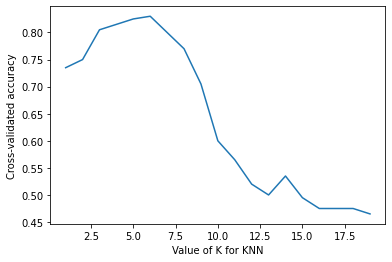

In [ ]:
#plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.2549900398011133
RMSE value for k=  2 is: 1.2673791855636576
RMSE value for k=  3 is: 1.1737877907772674
RMSE value for k=  4 is: 1.1138334704972732
RMSE value for k=  5 is: 1.2280065146407
RMSE value for k=  6 is: 1.3110110602126894
RMSE value for k=  7 is: 1.4258903412626522
RMSE value for k=  8 is: 1.418213004100583
RMSE value for k=  9 is: 1.3981910712077008
RMSE value for k=  10 is: 1.4329166060870395
RMSE value for k=  11 is: 1.461913158380014
RMSE value for k=  12 is: 1.4523687548277815
RMSE value for k=  13 is: 1.456113413230353
RMSE value for k=  14 is: 1.5275113146312633
RMSE value for k=  15 is: 1.546824704569547
RMSE value for k=  16 is: 1.6065661167533691
RMSE value for k=  17 is: 1.6466386018556431
RMSE value for k=  18 is: 1.6673609664954354
RMSE value for k=  19 is: 1.6890965311114525
RMSE value for k=  20 is: 1.6691689548994135


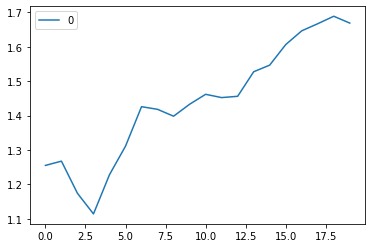

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
print("The model used is KNN classifier")
acc= accuracy_score(y_test,y_prediction)
print("The accuracy is {} %".format(acc*100))
prec= precision_score(y_test,y_prediction)
print("The precision is {} %".format(prec*100))
rec= recall_score(y_test,y_prediction)
print("The recall is {} %".format(rec*100))
f1= f1_score(y_test,y_prediction)
print("The F1-Score is {} %".format(f1*100))

#Boosting Algorithms


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model6= GradientBoostingClassifier(learning_rate=0.05, max_depth=25, n_estimators=200,random_state=42)
model6.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=25,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = model6.predict(x_test)

In [ ]:
print("The model used is Naive Bayes classifier")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is {} %".format(acc*100))
prec= precision_score(y_test,y_pred,average='micro')
print("The precision is {} %".format(prec*100))
rec= recall_score(y_test,y_pred,average='micro')
print("The recall is {} %".format(rec*100))
f1= f1_score(y_test,y_pred,average='micro')
print("The F1-Score is {} %".format(f1*100))

The model used is Naive Bayes classifier
The accuracy is 82.5 %
The precision is 82.5 %
The recall is 82.5 %
The F1-Score is 82.5 %


In [ ]:
y_train_pred = model6.predict(x_train)
GB_train_accuracy = accuracy_score(y_train,y_train_pred)
GB_train_f1 = f1_score(y_train,y_train_pred,average='micro')
print("Gradient Boosting Training Accuracy: ", GB_train_accuracy*100,"%")
print("Gradient Boosting F1 Score: ", GB_train_f1*100,"%")

Gradient Boosting Training Accuracy:  85.625 %
Gradient Boosting F1 Score:  85.625 %


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
print(multiclass_roc_auc_score(y_test, y_pred, average="macro"))

0.9179755977782293


In [ ]:
parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[2, 3, 5, 8],
    "max_features":["log2","sqrt"],
    "n_estimators":[10,20,50,100]
    }

GB_grid_search_cross_val = GridSearchCV(model6, parameters, cv=5, verbose =2)

#Fitting our model to data
GB_grid_search_cross_val.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10 
[CV]  learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10 
[CV]  learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10 
[CV]  learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10 
[CV]  learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=10, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=20 
[CV]  learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=20, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=20 
[CV]  learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=20, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=20 
[CV]  learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=20, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=20 
[CV]  learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=20, total=   0.1s
[CV] learning_rate=0.01, max_depth=2, max_features=log2, n_estimators=20 
[CV]  learning_rate=0.

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=1.0,
                                                  loss='deviance', max_depth=1,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 

{'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 200, 'num_leaves': 300}


#LightGBM Boosting

In [ ]:
from numpy import mean
from numpy import std
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model
model7 = LGBMClassifier(learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=300)
# fit the model on the whole dataset
model7 = LGBMClassifier()
model7.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred=model7.predict(x_test)

In [ ]:
print("The model used is Light gbm classifier")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is {} %".format(acc*100))
prec= precision_score(y_test,y_pred,average='micro')
print("The precision is {} %".format(prec*100))
rec= recall_score(y_test,y_pred,average='micro')
print("The recall is {} %".format(rec*100))
f1= f1_score(y_test,y_pred,average='micro')
print("The F1-Score is {} %".format(f1*100))

The model used is Light gbm classifier
The accuracy is 85.0 %
The precision is 85.0 %
The recall is 85.0 %
The F1-Score is 85.0 %


In [ ]:
y_train_pred = model7.predict(x_train)
LGBM_train_accuracy = accuracy_score(y_train,y_train_pred)
LGBM_train_f1 = f1_score(y_train,y_train_pred,average='micro')
print("Gradient Boosting Training Accuracy: ", LGBM_train_accuracy*100,"%")
print("Gradient Boosting F1 Score: ", LGBM_train_f1*100,"%")

Gradient Boosting Training Accuracy:  85.625 %
Gradient Boosting F1 Score:  85.625 %


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
print(multiclass_roc_auc_score(y_test, y_pred, average="macro"))

0.9239279787306103


In [ ]:
lg = LGBMClassifier(silent=False)
param_grid= {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid=GridSearchCV(lg,param_grid,n_jobs=-1, cv = 3,verbose=5)
# fitting the model for grid search 
grid.fit(x_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   28.4s finished


{'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 200, 'num_leaves': 300}


#CATBOOST Algo

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:

# fit the model on the whole dataset
model8 = CatBoostClassifier(depth=6, iterations= 50, l2_leaf_reg=5, learning_rate=0.03)
model8.fit(x_train, y_train)

0:	learn: 2.1794304	total: 1.73ms	remaining: 84.6ms
1:	learn: 2.1654744	total: 2.93ms	remaining: 70.4ms
2:	learn: 2.1481061	total: 3.47ms	remaining: 54.3ms
3:	learn: 2.1307683	total: 4.57ms	remaining: 52.6ms
4:	learn: 2.1157778	total: 5.85ms	remaining: 52.6ms
5:	learn: 2.0961195	total: 7.22ms	remaining: 53ms
6:	learn: 2.0791001	total: 8.56ms	remaining: 52.6ms
7:	learn: 2.0634648	total: 9.91ms	remaining: 52.1ms
8:	learn: 2.0448955	total: 11.2ms	remaining: 51.2ms
9:	learn: 2.0263817	total: 12.4ms	remaining: 49.8ms
10:	learn: 2.0082860	total: 14.3ms	remaining: 50.7ms
11:	learn: 1.9921060	total: 15.5ms	remaining: 49.2ms
12:	learn: 1.9734500	total: 16.8ms	remaining: 47.9ms
13:	learn: 1.9570358	total: 18.1ms	remaining: 46.5ms
14:	learn: 1.9408667	total: 19.6ms	remaining: 45.7ms
15:	learn: 1.9250235	total: 20.8ms	remaining: 44.2ms
16:	learn: 1.9078897	total: 22.1ms	remaining: 42.8ms
17:	learn: 1.8926675	total: 26.1ms	remaining: 46.3ms
18:	learn: 1.8793941	total: 28ms	remaining: 45.6ms
19:	lea

In [ ]:
y_pred=model8.predict(x_test)

In [ ]:
print("The model used is Cat boost classifier")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is {} %".format(acc*100))
prec= precision_score(y_test,y_pred,average='micro')
print("The precision is {} %".format(prec*100))
rec= recall_score(y_test,y_pred,average='micro')
print("The recall is {} %".format(rec*100))
f1= f1_score(y_test,y_pred,average='micro')
print("The F1-Score is {} %".format(f1*100))

The model used is Cat boost classifier
The accuracy is 77.5 %
The precision is 77.5 %
The recall is 77.5 %
The F1-Score is 77.5 %


In [ ]:
y_train_pred = model8.predict(x_train)
LGBM_train_accuracy = accuracy_score(y_train,y_train_pred)
LGBM_train_f1 = f1_score(y_train,y_train_pred,average='micro')
print("Gradient Boosting Training Accuracy: ", LGBM_train_accuracy*100,"%")
print("Gradient Boosting F1 Score: ", LGBM_train_f1*100,"%")

Gradient Boosting Training Accuracy:  84.375 %
Gradient Boosting F1 Score:  84.375 %


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)
print(multiclass_roc_auc_score(y_test, y_pred, average="macro"))

0.8810708358734674


In [ ]:
CB= CatBoostClassifier()

param_grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'iterations':(10,50)}
grid = GridSearchCV(CB,param_grid,cv=None,n_jobs=-1)
# fitting the model for grid search 
grid.fit(x_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 

0:	learn: 2.1383640	total: 1.56ms	remaining: 76.5ms
1:	learn: 2.0932482	total: 2.68ms	remaining: 64.3ms
2:	learn: 2.0399319	total: 3.15ms	remaining: 49.3ms
3:	learn: 1.9816819	total: 4.25ms	remaining: 48.9ms
4:	learn: 1.9365565	total: 5.36ms	remaining: 48.2ms
5:	learn: 1.8804205	total: 6.41ms	remaining: 47ms
6:	learn: 1.8385967	total: 7.51ms	remaining: 46.1ms
7:	learn: 1.7944943	total: 8.69ms	remaining: 45.6ms
8:	learn: 1.7440786	total: 9.96ms	remaining: 45.4ms
9:	learn: 1.6949734	total: 11ms	remaining: 44.1ms
10:	learn: 1.6490812	total: 12.2ms	remaining: 43.3ms
11:	learn: 1.6091409	total: 13.3ms	remaining: 42.1ms
12:	learn: 1.5722964	total: 14.4ms	remaining: 41ms
13:	learn: 1.5323613	total: 15.5ms	remaining: 39.9ms
14:	learn: 1.4957584	total: 16.6ms	remaining: 38.7ms
15:	learn: 1.4598647	total: 17.7ms	remaining: 37.6ms
16:	learn: 1.4268737	total: 18.8ms	remaining: 36.4ms
17:	learn: 1.3944105	total: 19.8ms	remaining: 35.2ms
18:	learn: 1.3673000	total: 20.9ms	remaining: 34.1ms
19:	learn